# I. Import Libraries

Let's start by reading the file to understand its structure and content. This will help in providing an overview of the data you mentioned. I'll read the file and display the first few rows to get a sense of the data.

The dataset contains information on the betting activity of individual customers for specific days. Here's an overview of the columns and their potential meanings:

- `DATE_DIM`: The date of the betting activity.
- `DAY_OF_WEEK`: The day of the week for the betting activity.
- `BET_ACCOUNT_NUM_HASH`: A unique identifier for each customer.
- `AGE`: The age of the customer.
- `AGE_BAND`: The age band or range the customer falls into.
- `GENDER`: The gender of the customer.
- `TENURE_IN_DAYS`: How long the customer has been with the service, in days.
- `RESIDENTIAL_STATE`: The state of residence of the customer.
- `FOB_RACING_TURNOVER`: Turnover from fixed odds betting on racing.
- `FOB_SPORT_TURNOVER`: Turnover from fixed odds betting on sports.
- `PARI_RACING_TURNOVER`: Turnover from pari-mutuel betting on racing.
- `PARI_SPORT_TURNOVER`: Turnover from pari-mutuel betting on sports.
- `TOTAL_TURNOVER`: The total betting turnover for the customer on that day.
- `DIVIDENDS_PAID`: The total dividends paid out to the customer on that day.
- `GROSS_MARGIN`: The gross margin from the customer's betting activity.
- `TICKETS`: The number of betting tickets or bets placed by the customer on that day.

The data seems well-structured for analysis, offering a comprehensive view of daily betting activities alongside demographic information about the customers. This dataset can be used to perform descriptive, diagnostic, predictive, and prescriptive analyses as outlined in your project guidelines, aiming to forecast future turnover based on historical wagering transactions and to optimize strategic decisions for WA TAB.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# II. Import & Overview Dataset

## 2.1 Import Dataset

In [17]:
df_origin = pd.read_csv(r"D:\Data\TAB_Betting_Data.csv")
df = df_origin.copy()

In [18]:
df.head()

,DATE_DIM,DAY_OF_WEEK,BET_ACCOUNT_NUM_HASH,AGE,AGE_BAND,GENDER,TENURE_IN_DAYS,RESIDENTIAL_STATE,FOB_RACING_TURNOVER,FOB_SPORT_TURNOVER,PARI_RACING_TURNOVER,PARI_SPORT_TURNOVER,TOTAL_TURNOVER,DIVIDENDS_PAID,GROSS_MARGIN,TICKETS
0,2021-01-01,Fri,13154,67.0,65+,M,11846,WA,37.0,NaN,1081.0,NaN,1118.0,443.55,271.254275,288
1,2021-01-01,Fri,18379,54.0,45-54,M,1884,WA,40.0,NaN,NaN,NaN,40.0,0.00,40.000000,1
2,2021-01-01,Fri,559232,63.0,55-64,M,2866,WA,NaN,NaN,12.0,NaN,12.0,9.50,2.041720,5
3,2021-01-01,Fri,698904,69.0,65+,M,2100,WA,NaN,NaN,1223.5,NaN,1223.5,267.91,245.117147,40
4,2021-01-01,Fri,762921,67.0,65+,M,4766,WA,NaN,NaN,17.5,NaN,17.5,0.00,3.504075,5


In [19]:
# Fill missing AGE values with the median and betting turnover columns with 0
df['AGE'].fillna(df['AGE'].median(), inplace=True)
betting_columns = ['FOB_RACING_TURNOVER', 'FOB_SPORT_TURNOVER', 'PARI_RACING_TURNOVER', 'PARI_SPORT_TURNOVER']
df[betting_columns] = df[betting_columns].fillna(0)

# Exclude rows with negative values in specified turnover and dividends columns
exclude_negative_columns = ['FOB_RACING_TURNOVER', 'FOB_SPORT_TURNOVER', 'PARI_RACING_TURNOVER', 'PARI_SPORT_TURNOVER', 'TOTAL_TURNOVER', 'DIVIDENDS_PAID']
df = df[~(df[exclude_negative_columns] < 0).any(axis=1)]

# Convert DATE_DIM to datetime and sort by BET_ACCOUNT_NUM_HASH and DATE_DIM
df['DATE_DIM'] = pd.to_datetime(df['DATE_DIM'])

In [20]:
# Sum the turnover for each betting category to understand where the majority of bets are placed
turnover_by_category = df[['FOB_RACING_TURNOVER', 'FOB_SPORT_TURNOVER', 'PARI_RACING_TURNOVER', 'PARI_SPORT_TURNOVER']].sum()

# Calculate the percentage of total turnover for each betting category for better insight
total_turnover = turnover_by_category.sum()
percentage_turnover_by_category = (turnover_by_category / total_turnover) * 100

turnover_by_category, percentage_turnover_by_category


(FOB_RACING_TURNOVER     1.060019e+09
 FOB_SPORT_TURNOVER      2.275056e+08
 PARI_RACING_TURNOVER    9.067553e+08
 PARI_SPORT_TURNOVER     5.926365e+05
 dtype: float64,
 FOB_RACING_TURNOVER     48.295251
 FOB_SPORT_TURNOVER      10.365318
 PARI_RACING_TURNOVER    41.312430
 PARI_SPORT_TURNOVER      0.027001
 dtype: float64)

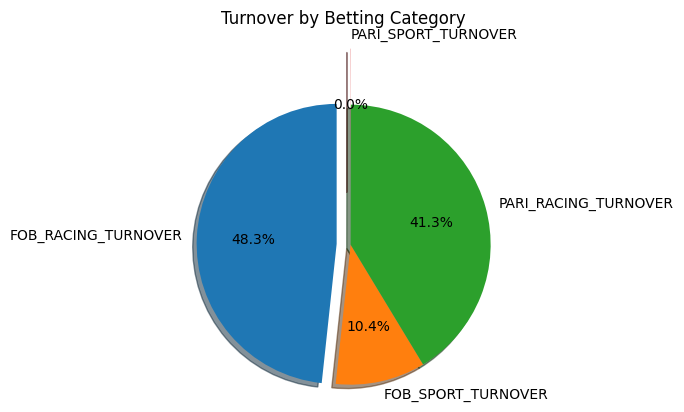

In [21]:
import matplotlib.pyplot as plt

# Prepare data for pie chart
labels = turnover_by_category.index
sizes = turnover_by_category.values
explode = (0.1, 0, 0, 0.4)  # 'explode' the 1st and last slice (FOB_RACING and PARI_SPORT)

# Plot
fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
       shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Title
plt.title('Turnover by Betting Category')

# Show the pie chart
plt.show()


In [22]:
# Group the data by residential state and sum the turnover for each betting category within each state
turnover_by_state_category = df.groupby('RESIDENTIAL_STATE')[['FOB_RACING_TURNOVER', 'FOB_SPORT_TURNOVER', 'PARI_RACING_TURNOVER', 'PARI_SPORT_TURNOVER']].sum()

# Because the dataset might contain a large number of states, making the output extensive,
# let's preview the data for the first few states to get a sense of the distribution
turnover_by_state_category.head()


,FOB_RACING_TURNOVER,FOB_SPORT_TURNOVER,PARI_RACING_TURNOVER,PARI_SPORT_TURNOVER
RESIDENTIAL_STATE,,,,
OTH,1.906562e+08,6.985395e+07,5.719369e+07,20975.5
WA,8.693631e+08,1.576516e+08,8.495616e+08,571661.0


In [23]:
# Define age bands for segmentation
bins = [0, 18, 24, 34, 44, 54, 64, 74, 100]
labels = ['<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65-74', '>74']
df['AGE_BAND'] = pd.cut(df['AGE'], bins=bins, labels=labels, right=False)

# Calculate average turnover in each betting category by age band
age_segmentation = df.groupby('AGE_BAND')[['FOB_RACING_TURNOVER', 'FOB_SPORT_TURNOVER', 'PARI_RACING_TURNOVER', 'PARI_SPORT_TURNOVER']].mean()

age_segmentation


C:\Users\thanh\AppData\Local\Temp\ipykernel_9120\2103280912.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_segmentation = df.groupby('AGE_BAND')[['FOB_RACING_TURNOVER', 'FOB_SPORT_TURNOVER', 'PARI_RACING_TURNOVER', 'PARI_SPORT_TURNOVER']].mean()


,FOB_RACING_TURNOVER,FOB_SPORT_TURNOVER,PARI_RACING_TURNOVER,PARI_SPORT_TURNOVER
AGE_BAND,,,,
<18,NaN,NaN,NaN,NaN
18-24,143.312583,33.481904,26.174268,0.002016
25-34,128.273789,46.799909,56.394618,0.006351
35-44,107.138540,37.680485,72.257066,0.024973
45-54,92.725725,18.984852,82.574381,0.045050
55-64,78.804627,8.549737,87.105782,0.076692
65-74,60.578840,4.481489,71.351591,0.070059
>74,39.459868,1.880000,53.957323,0.030605


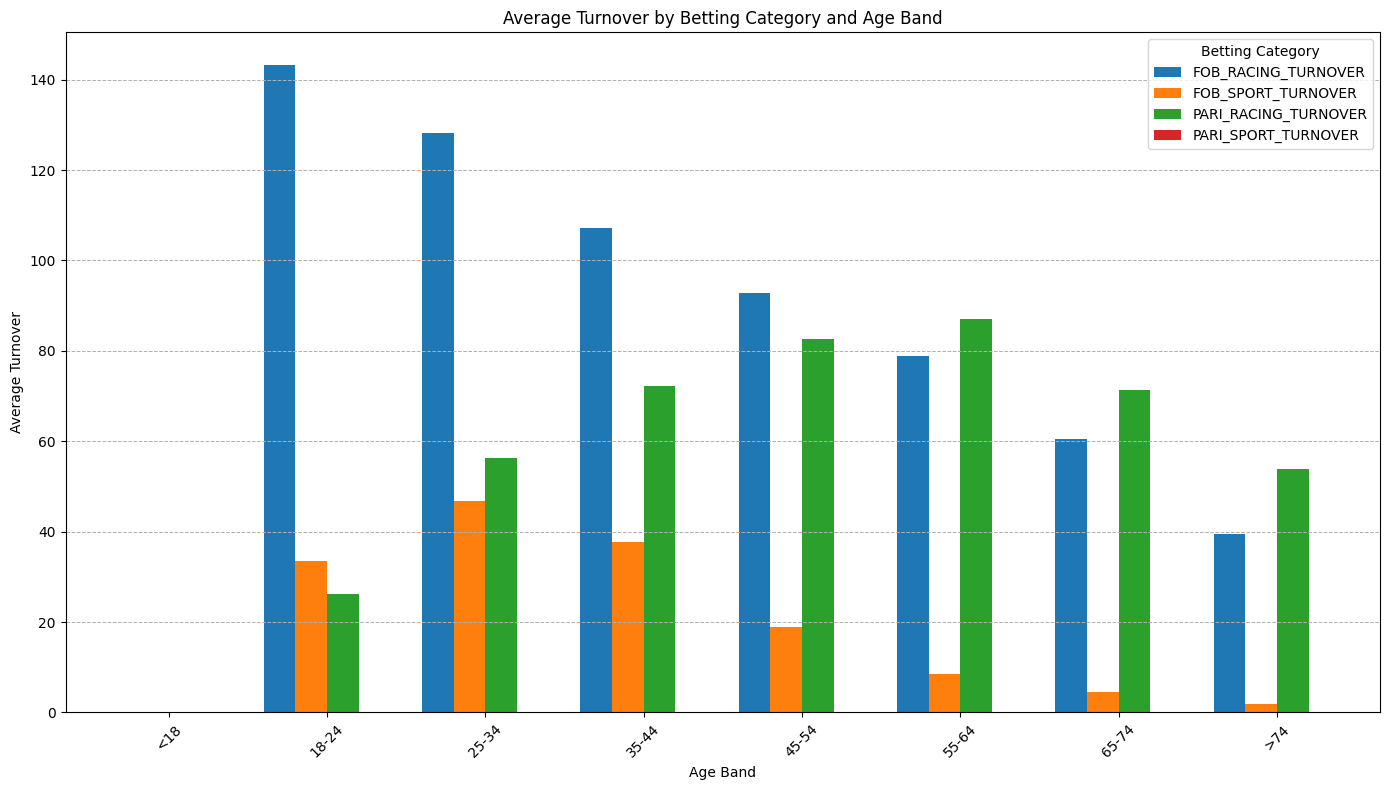

In [24]:
# Let's visualize the average turnover in each betting category by age band using bar plots for clearer comparison

# Plotting
age_segmentation.plot(kind='bar', figsize=(14, 8), width=0.8)
plt.title('Average Turnover by Betting Category and Age Band')
plt.xlabel('Age Band')
plt.ylabel('Average Turnover')
plt.xticks(rotation=45)
plt.legend(title='Betting Category')
plt.grid(axis='y', linestyle='--', linewidth=0.7)

# Show plot
plt.tight_layout()
plt.show()


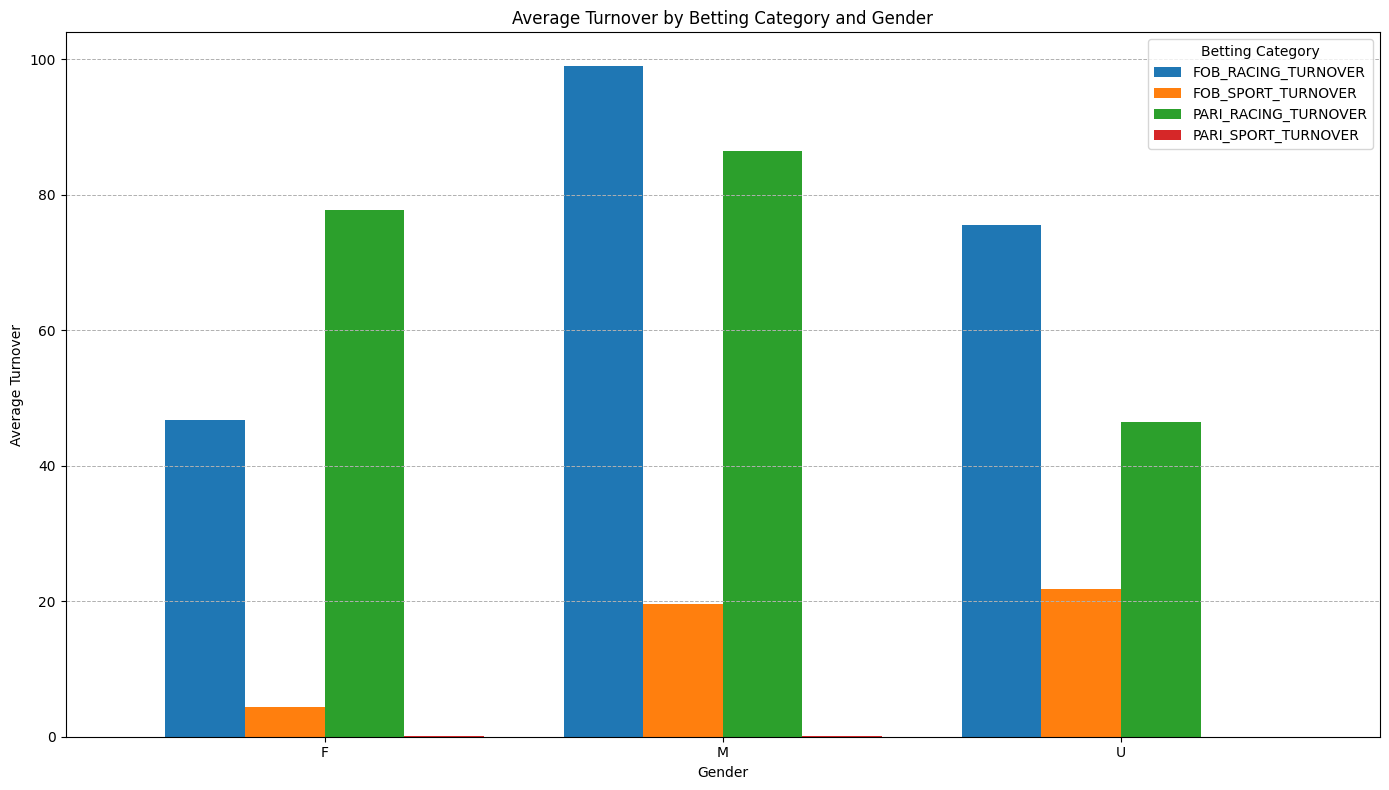

In [25]:
# Calculate average turnover in each betting category by gender
gender_segmentation = df.groupby('GENDER')[['FOB_RACING_TURNOVER', 'FOB_SPORT_TURNOVER', 'PARI_RACING_TURNOVER', 'PARI_SPORT_TURNOVER']].mean()

# Plotting
gender_segmentation.plot(kind='bar', figsize=(14, 8), width=0.8)
plt.title('Average Turnover by Betting Category and Gender')
plt.xlabel('Gender')
plt.ylabel('Average Turnover')
plt.xticks(rotation=0)
plt.legend(title='Betting Category')
plt.grid(axis='y', linestyle='--', linewidth=0.7)

# Show plot
plt.tight_layout()
plt.show()


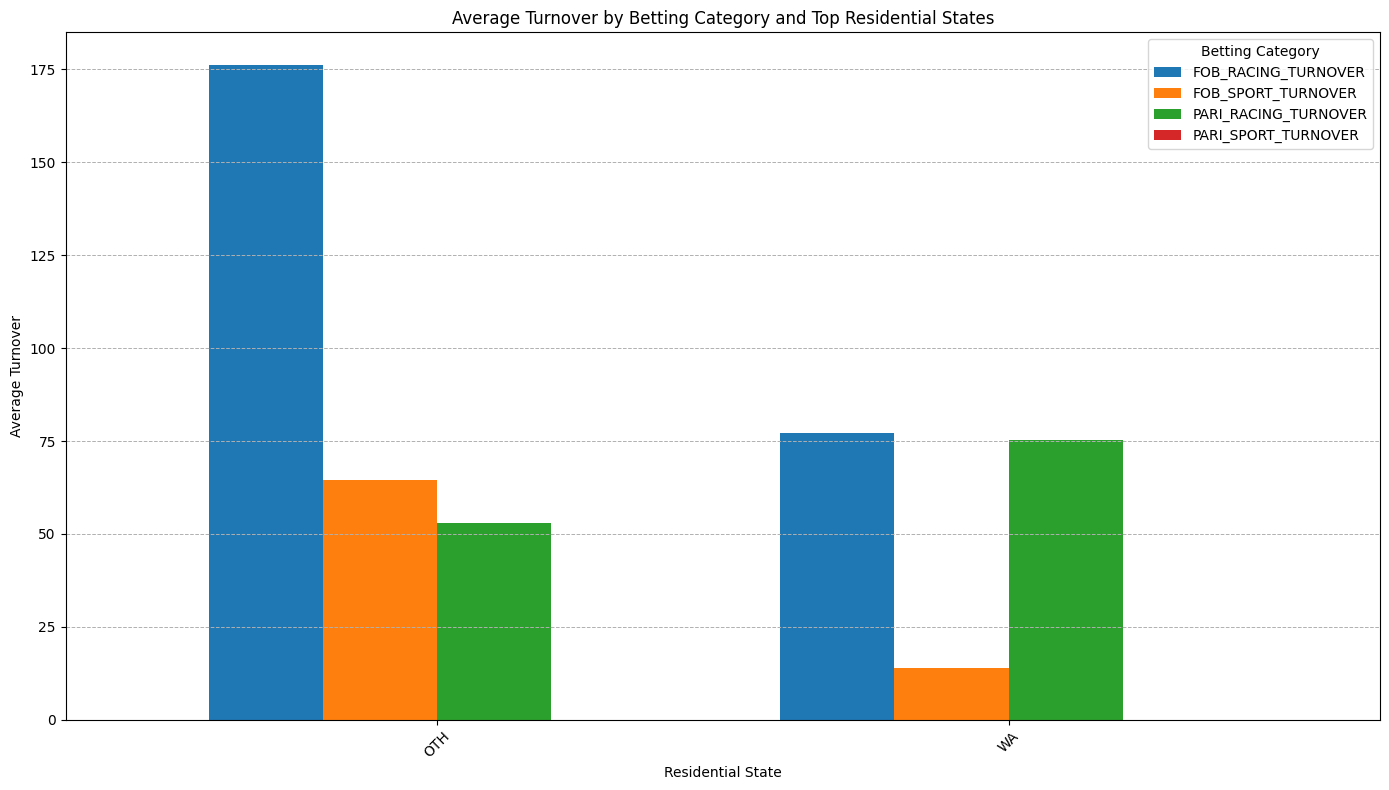

In [26]:
# Calculate average turnover in each betting category by residential state
state_segmentation = df.groupby('RESIDENTIAL_STATE')[['FOB_RACING_TURNOVER', 'FOB_SPORT_TURNOVER', 'PARI_RACING_TURNOVER', 'PARI_SPORT_TURNOVER']].mean()

# Since there could be many states, resulting in a cluttered chart, we'll focus on the top states by overall turnover for simplicity
# Calculate overall turnover by state to identify top states
overall_turnover_by_state = df.groupby('RESIDENTIAL_STATE')['TOTAL_TURNOVER'].mean().sort_values(ascending=False)

# Select top 5 states for detailed visualization
top_states = overall_turnover_by_state.head(5).index

# Filter state segmentation for top states
top_state_segmentation = state_segmentation.loc[top_states]

# Plotting
top_state_segmentation.plot(kind='bar', figsize=(14, 8), width=0.8)
plt.title('Average Turnover by Betting Category and Top Residential States')
plt.xlabel('Residential State')
plt.ylabel('Average Turnover')
plt.xticks(rotation=45)
plt.legend(title='Betting Category')
plt.grid(axis='y', linestyle='--', linewidth=0.7)

# Show plot
plt.tight_layout()
plt.show()


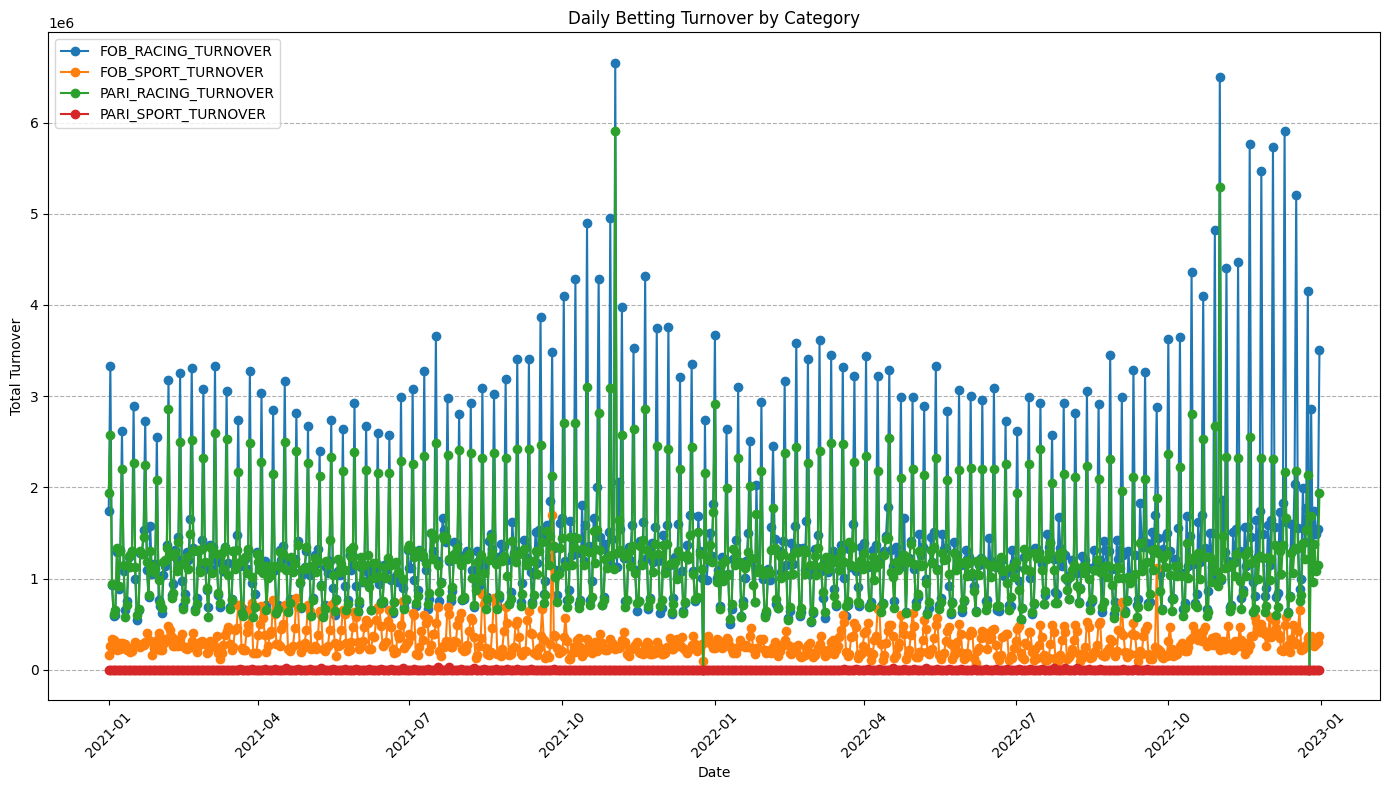

In [34]:
# Group data by day and sum turnover for each betting category
daily_turnover = df.groupby(df['DATE_DIM'].dt.date)[['FOB_RACING_TURNOVER', 'FOB_SPORT_TURNOVER', 'PARI_RACING_TURNOVER', 'PARI_SPORT_TURNOVER']].sum()

# Plotting the trends over time for each category
plt.figure(figsize=(14, 8))
for column in daily_turnover.columns:
    plt.plot(daily_turnover.index, daily_turnover[column], label=column, marker='o')

plt.title('Daily Betting Turnover by Category')
plt.xlabel('Date')
plt.ylabel('Total Turnover')
plt.legend()
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')

# Show the plot
plt.tight_layout()
plt.show()


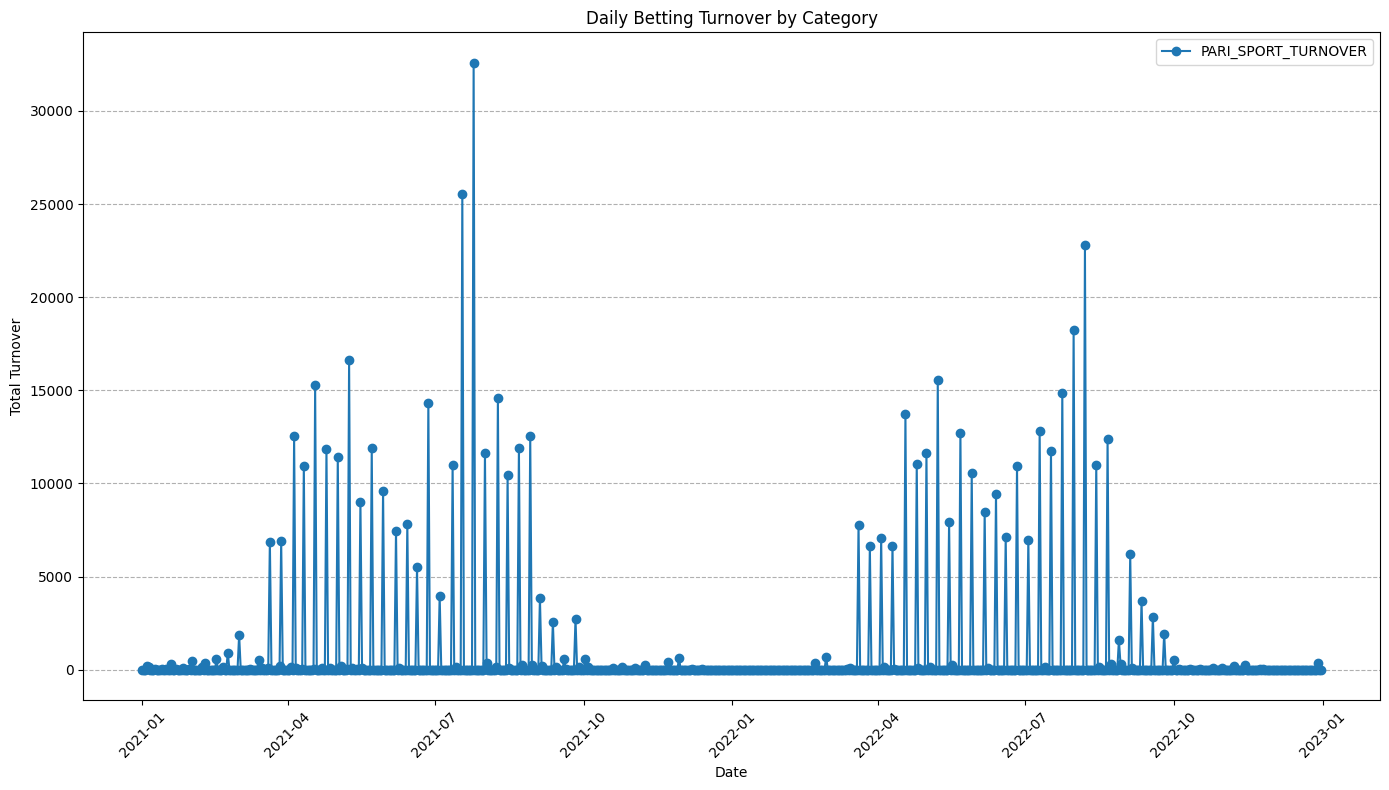

In [33]:
# Group data by day and sum turnover for each betting category
daily_turnover = df.groupby(df['DATE_DIM'].dt.date)[['PARI_SPORT_TURNOVER']].sum()

# Plotting the trends over time for each category
plt.figure(figsize=(14, 8))
for column in daily_turnover.columns:
    plt.plot(daily_turnover.index, daily_turnover[column], label=column, marker='o')

plt.title('Daily Betting Turnover by Category')
plt.xlabel('Date')
plt.ylabel('Total Turnover')
plt.legend()
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')

# Show the plot
plt.tight_layout()
plt.show()


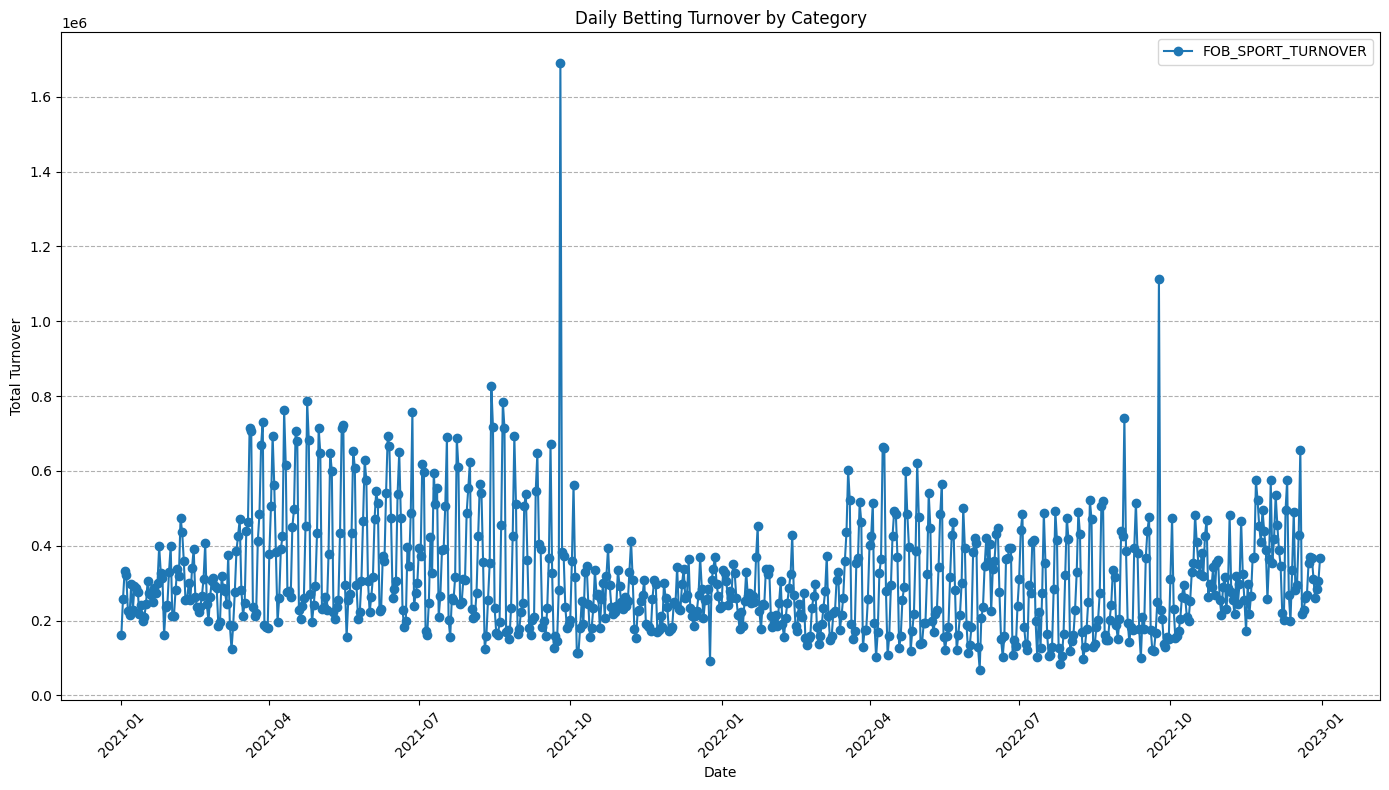

In [32]:
# Group data by day and sum turnover for each betting category
daily_turnover = df.groupby(df['DATE_DIM'].dt.date)[['FOB_SPORT_TURNOVER']].sum()

# Plotting the trends over time for each category
plt.figure(figsize=(14, 8))
for column in daily_turnover.columns:
    plt.plot(daily_turnover.index, daily_turnover[column], label=column, marker='o')

plt.title('Daily Betting Turnover by Category')
plt.xlabel('Date')
plt.ylabel('Total Turnover')
plt.legend()
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')

# Show the plot
plt.tight_layout()
plt.show()


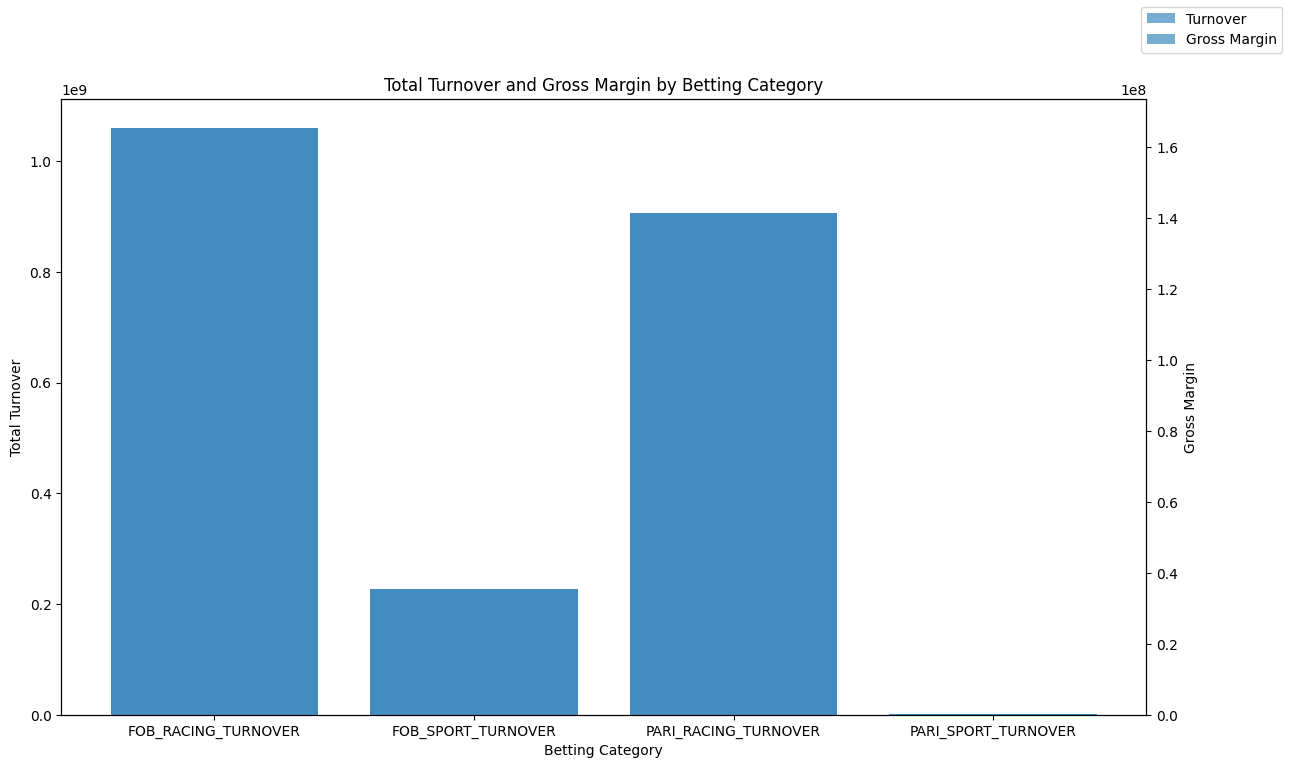

FOB_RACING_TURNOVER     1.654714e+08
FOB_SPORT_TURNOVER      3.551413e+07
PARI_RACING_TURNOVER    1.415465e+08
PARI_SPORT_TURNOVER     9.251189e+04
dtype: float64

In [28]:
# To analyze profitability, we need to find a way to attribute the gross margin to each betting category.
# If gross margin is recorded per transaction, we would directly sum it up; 
# if it's not, we might need to distribute it proportionally based on turnover.

# We will make an assumption here for the demonstration: that the gross margin can be distributed 
# proportionally to the turnover of each betting category.
# Calculate total turnovers for proportion calculation
total_turnover_by_category = df[['FOB_RACING_TURNOVER', 'FOB_SPORT_TURNOVER', 'PARI_RACING_TURNOVER', 'PARI_SPORT_TURNOVER']].sum()

# Calculate the proportion of each category's turnover to the total turnover
proportions = total_turnover_by_category / total_turnover_by_category.sum()

# Apply the proportions to the total gross margin
total_gross_margin = df['GROSS_MARGIN'].sum()
gross_margin_by_category = proportions * total_gross_margin

# Now let's visualize the turnover and gross margin by betting category
fig, ax1 = plt.subplots(figsize=(14, 8))

# Bar plot for turnover by category
turnover_bars = ax1.bar(total_turnover_by_category.index, total_turnover_by_category, label='Turnover', alpha=0.6)

# Secondary axis for gross margin
ax2 = ax1.twinx()
margin_bars = ax2.bar(gross_margin_by_category.index, gross_margin_by_category, label='Gross Margin', alpha=0.6)

# Titles, labels and legend
ax1.set_title('Total Turnover and Gross Margin by Betting Category')
ax1.set_xlabel('Betting Category')
ax1.set_ylabel('Total Turnover')
ax2.set_ylabel('Gross Margin')
fig.legend()

# Show the plot
plt.show()

gross_margin_by_category


In [29]:
# Creating a DataFrame to display the turnover and gross margin with exact figures
profitability_df = pd.DataFrame({
    'Total_Turnover': total_turnover_by_category,
    'Estimated_Gross_Margin': gross_margin_by_category
})

profitability_df


,Total_Turnover,Estimated_Gross_Margin
FOB_RACING_TURNOVER,1.060019e+09,1.654714e+08
FOB_SPORT_TURNOVER,2.275056e+08,3.551413e+07
PARI_RACING_TURNOVER,9.067553e+08,1.415465e+08
PARI_SPORT_TURNOVER,5.926365e+05,9.251189e+04


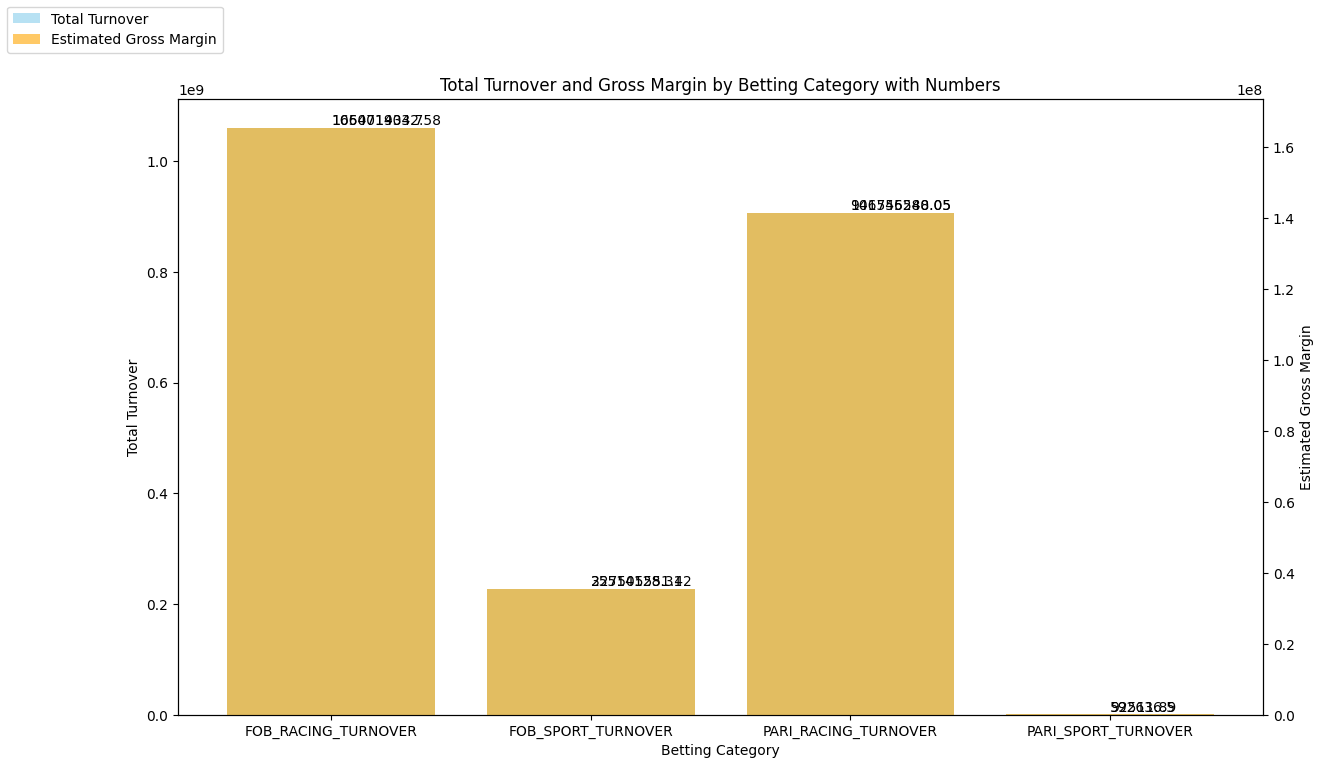

In [30]:
# Plotting the turnover and gross margin by betting category with the actual numbers displayed on top of each bar

fig, ax1 = plt.subplots(figsize=(14, 8))

# Bar plot for turnover by category
turnover_bars = ax1.bar(profitability_df.index, profitability_df['Total_Turnover'], label='Total Turnover', alpha=0.6, color='skyblue')

# Add the text on the bars
for bar in turnover_bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')  # round to 2 decimals for display

# Secondary axis for gross margin
ax2 = ax1.twinx()
margin_bars = ax2.bar(profitability_df.index, profitability_df['Estimated_Gross_Margin'], label='Estimated Gross Margin', alpha=0.6, color='orange')

# Add the text on the bars
for bar in margin_bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')  # round to 2 decimals for display

# Titles, labels and legend
ax1.set_title('Total Turnover and Gross Margin by Betting Category with Numbers')
ax1.set_xlabel('Betting Category')
ax1.set_ylabel('Total Turnover')
ax2.set_ylabel('Estimated Gross Margin')
fig.legend(loc='upper left')

# Show the plot
plt.show()
